In [33]:
import requests
from datetime import datetime

headers = {'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/130.0.0.0 Safari/537.36'}
now = datetime.now()
data_url = 'https://iboard-api.ssi.com.vn/statistics/company/ssmi/stock-info?symbol={}&page=1&pageSize=1000&fromDate=01/08/2021&toDate={}'
list_symbol_url = 'https://iboard-query.ssi.com.vn/stock/exchange/hose?boardId=MAIN'

In [45]:
data = {}
def get_data(symbol):

    print(symbol)
    data[symbol] = {}
    data_res = requests.get(data_url.format(symbol, now.strftime('%d/%m/%Y')), headers=headers).json()
    
    for row in data_res['data']:
        date = row['tradingDate']
        data[symbol][date] = {}
        data[symbol][date]['ClosePrice'] = float(row['close'])
        data[symbol][date]['ClosePriceAdjusted'] = float(row['closePriceAdjusted'])

        if  row['foreignBuyVolTotal'] != None:
            data[symbol][date]['BuyVolume'] = float(row['foreignBuyVolTotal'])
        else:
            data[symbol][date]['BuyVolume'] = 0

        if row['foreignSellVolTotal'] != None:
            data[symbol][date]['SellVolume'] = float(row['foreignSellVolTotal'])
        else:
            data[symbol][date]['SellVolume'] = 0
        if row['foreignBuyValTotal'] != None:
            data[symbol][date]['BuyValue'] = float(row['foreignBuyValTotal'])
        else:
            data[symbol][date]['BuyValue'] = 0
        if row['foreignSellValTotal'] != None:
            data[symbol][date]['SellValue'] = float(row['foreignSellValTotal'])
        else:
            data[symbol][date]['SellValue'] = 0

list_symbol_res = requests.get(list_symbol_url, headers=headers).json()['data']
list_symbol = [r['stockSymbol'] for r in list_symbol_res]
for symbol in list_symbol:
    get_data(symbol)

AAA
AAM
AAT
ABR
ABS
ABT
ACB
ACC
ACG
ACL
ADG
ADP
ADS
AGG
AGR
ANV
APG
APH
ASG
ASM
ASP
AST
BAF
BBC
BCE
BCG
BCM
BFC
BHN
BIC
BID
BKG
BMC
BMI
BMP
BRC
BSI
BSR
BTP
BTT
BVH
BWE
C32
C47
CCC
CCI
CCL
CDC
CHP
CIG
CII
CKG
CLC
CLL
CLW
CMG
CMV
CMX
CNG
COM
CRC
CRE
CSM
CSV
CTD
CTF
CTG
CTI
CTR
CTS
CVT
D2D
DAH
DAT
DBC
DBD
DBT
DC4
DCL
DCM
DGC
DGW
DHA
DHC
DHG
DHM
DIG
DLG
DMC
DPG
DPM
DPR
DQC
DRC
DRH
DRL
DSC
DSE
DSN
DTA
DTL
DTT
DVP
DXG
DXS
DXV
EIB
ELC
EVE
EVF
EVG
FCM
FCN
FDC
FIR
FIT
FMC
FPT
FRT
FTS
FUCTVGF3
FUCTVGF4
FUCTVGF5
FUCVREIT
GAS
GDT
GEE
GEG
GEX
GIL
GMD
GMH
GSP
GTA
GVR
HAG
HAH
HAP
HAR
HAS
HAX
HCD
HCM
HDB
HDC
HDG
HHP
HHS
HHV
HID
HII
HMC
HNA
HPG
HPX
HQC
HRC
HSG
HSL
HT1
HTG
HTI
HTL
HTN
HTV
HU1
HUB
HVH
HVN
HVX
ICT
IDI
IJC
ILB
IMP
ITC
ITD
JVC
KBC
KDC
KDH
KHG
KHP
KMR
KOS
KSB
L10
LAF
LBM
LCG
LDG
LGC
LGL
LHG
LIX
LM8
LPB
LSS
MBB
MCM
MCP
MDG
MHC
MIG
MSB
MSH
MSN
MWG
NAB
NAF
NAV
NBB
NCT
NHA
NHH
NHT
NKG
NLG
NNC
NO1
NSC
NT2
NTL
NVL
NVT
OCB
OGC
OPC
ORS
PAC
PAN
PC1
PDN
PDR
PET
PGC
PGD
PGI
PGV
PHC
PHR
PIT
PJT
PLP
PLX


In [42]:
def compute_profit(symbol):
    
    list_date = [k for k in data[symbol]]
    list_date.reverse()
    
    mdata = data[symbol]
    
    total_buy_volume = 0; total_buy_value = 0
    total_sell_volume = 0; total_sell_value = 0
    
    all_profit = []
    
    for date in list_date:
        
        rate = mdata[date]['ClosePriceAdjusted'] / mdata[date]['ClosePrice']
    
        if 'BuyVolume' in mdata[date]:
            buy_volume_adjusted = mdata[date]['BuyVolume'] / rate
        else:
            buy_volume_adjusted = 0
        if 'SellVolume' in mdata[date]:
            sell_volume_adjusted = mdata[date]['SellVolume'] / rate
        else:
            sell_volume_adjusted = 0
    
        total_buy_volume += buy_volume_adjusted
        total_sell_volume += sell_volume_adjusted
    
        if 'BuyValue' in mdata[date]:
            total_buy_value += mdata[date]['BuyValue']
        if 'SellValue' in mdata[date]:
            total_sell_value += mdata[date]['SellValue']
    
        profit = (float(mdata[date]['ClosePriceAdjusted']) * total_buy_volume - total_buy_value) + (total_sell_value - float(mdata[date]['ClosePriceAdjusted']) * total_sell_volume)
        all_profit.append(profit / 1e9)
        
    return list_date, all_profit

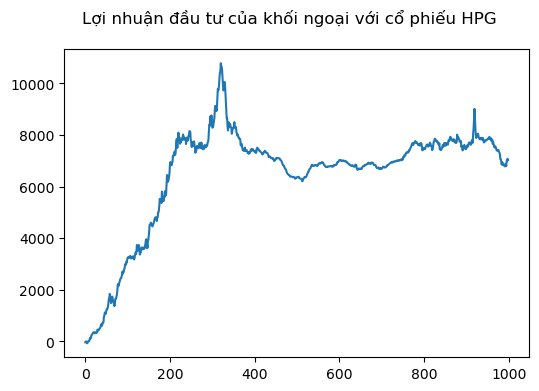

In [70]:
import matplotlib.pyplot as plt
symbol = 'HPG'
list_date, all_profit = compute_profit(symbol)
plt.figure(figsize=(6, 4))
plt.suptitle('Lợi nhuận đầu tư của khối ngoại với cổ phiếu ' + symbol)
plt.plot(all_profit)
# plt.savefig('img/khoingoai_{}.png'.format(symbol))
plt.show()

In [52]:
profit_lastday = {}
for symbol in list_symbol:
    _, all_profit = compute_profit(symbol)
    profit_lastday[symbol] = all_profit[-1]
sum([profit_lastday[k] for k in profit_lastday])

-13214.185128349873

In [54]:
{k: v for k, v in sorted(profit_lastday.items(), key=lambda item: item[1], reverse=True)}

{'HPG': 7035.877436565,
 'NVL': 5714.94576519,
 'MSN': 3111.673724348,
 'STB': 3108.69185155,
 'SSI': 2962.002979975,
 'FPT': 2516.89256596,
 'FRT': 2215.4376686,
 'CTG': 1556.998629992,
 'VCB': 1368.51367019,
 'VIX': 1308.41308987,
 'EIB': 1126.85163425,
 'SBT': 1066.81388335,
 'VCI': 868.534128,
 'CII': 857.6628213,
 'NLG': 786.741347676,
 'PVD': 786.59258765,
 'HCM': 722.0305075,
 'HSG': 691.93214323,
 'SAB': 640.07827893,
 'HVN': 526.83070857,
 'VND': 385.47485965,
 'NKG': 363.65575789,
 'TCB': 362.95262965,
 'CMG': 306.509994,
 'HPX': 282.93476374,
 'APH': 254.0026704,
 'PVT': 234.58649825,
 'AGG': 226.23532225,
 'CTR': 215.9556646,
 'HDB': 190.5769567,
 'POW': 187.32338714,
 'PAN': 176.7877962,
 'BID': 173.31755765,
 'GMD': 145.9719951,
 'PHR': 140.3179223,
 'ST8': 139.16257541,
 'CMX': 129.53858193,
 'SCS': 116.7292338,
 'AAA': 115.84330827,
 'CSV': 108.72344935,
 'YEG': 108.58243744,
 'PLX': 108.38203975,
 'VNM': 101.799374546,
 'PDR': 100.18314863883984,
 'DPR': 94.88195315,
 

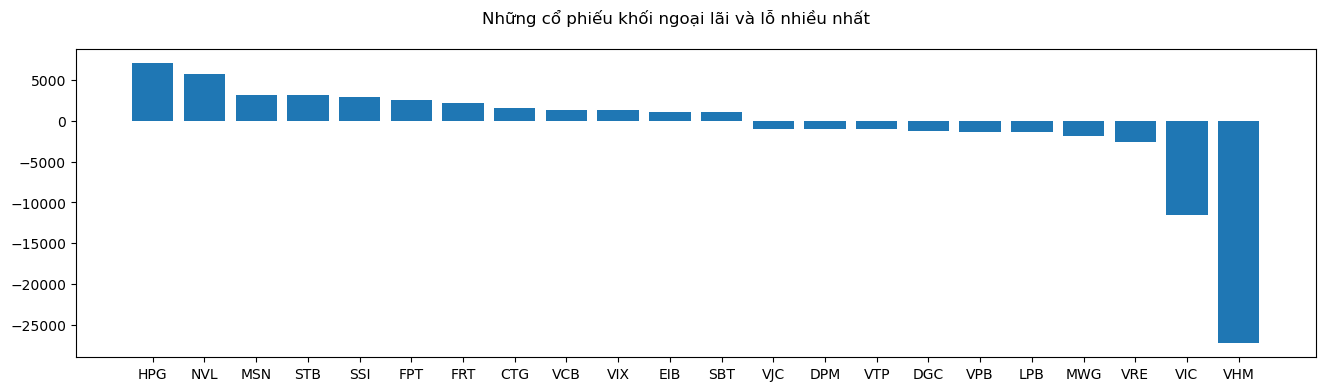

In [71]:
profit_lastday_ = {k: v for k, v in sorted(profit_lastday.items(), key=lambda item: item[1], reverse=True) if v > 1000 or v < -1000}

symbols = [k for k in profit_lastday_]
values = [profit_lastday_[k] for k in profit_lastday_]

plt.figure(figsize=(16, 4))
plt.bar(symbols, values)
plt.suptitle('Những cổ phiếu khối ngoại lãi và lỗ nhiều nhất')
plt.savefig('img/top_khoingoai_.png')
plt.show()